# **Used Car Data Analysis & Prediction**

## **Problem statement:**
- The dataset comprises used cars sold on cardehko.com in India as well as important features of those cars.
- Users can predict the price of the car based on input features.
- Prediction prices can be used to give new seller the price suggestion based on cars' condition and market demand.

### **Import Data and Required Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

### **Import the .csv data**

In [4]:
df = pd.read_csv('/Users/0s/Downloads/cardekho_dataset.csv', index_col = [0])

### **Top 5 Records**

In [5]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### **Shape of the dataset**

In [6]:
df.shape

(15411, 13)

### **Summary of the dataset**

In [7]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


### **Check Data types in the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


## Exploring Data

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information:

- car_name: car's full name, which includes brand and specific model name.
- brand: brand name of the particular car.
- model: model name of the car and its particular brand.
- seller_type: which type of seller is selling the used car.
- fuel_type: type of fuel that used selling car uses.
- transmission_type: which type of transmission used in the used selling car.
- vehicle_age: the count of years since the car was bought.
- mileage: it is the number of kilometers the car runs per liter.
- engine: it is the engine capacity in cc (cubic centimeters).
- max_power: max power it produces in BHP.
- seats: total number of seats in car.
- sellling_price: the sale price which was showed on the website.

In [11]:
for col in categorical_features:
    print(df[col].value_counts(normalize = True) * 100)
    print('---------------------------')

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
---------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini              0.

## Univariate Analysis:

- The term univariate analysis refers to the analysis of one variable prefix "uni", which means "one". 
- The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

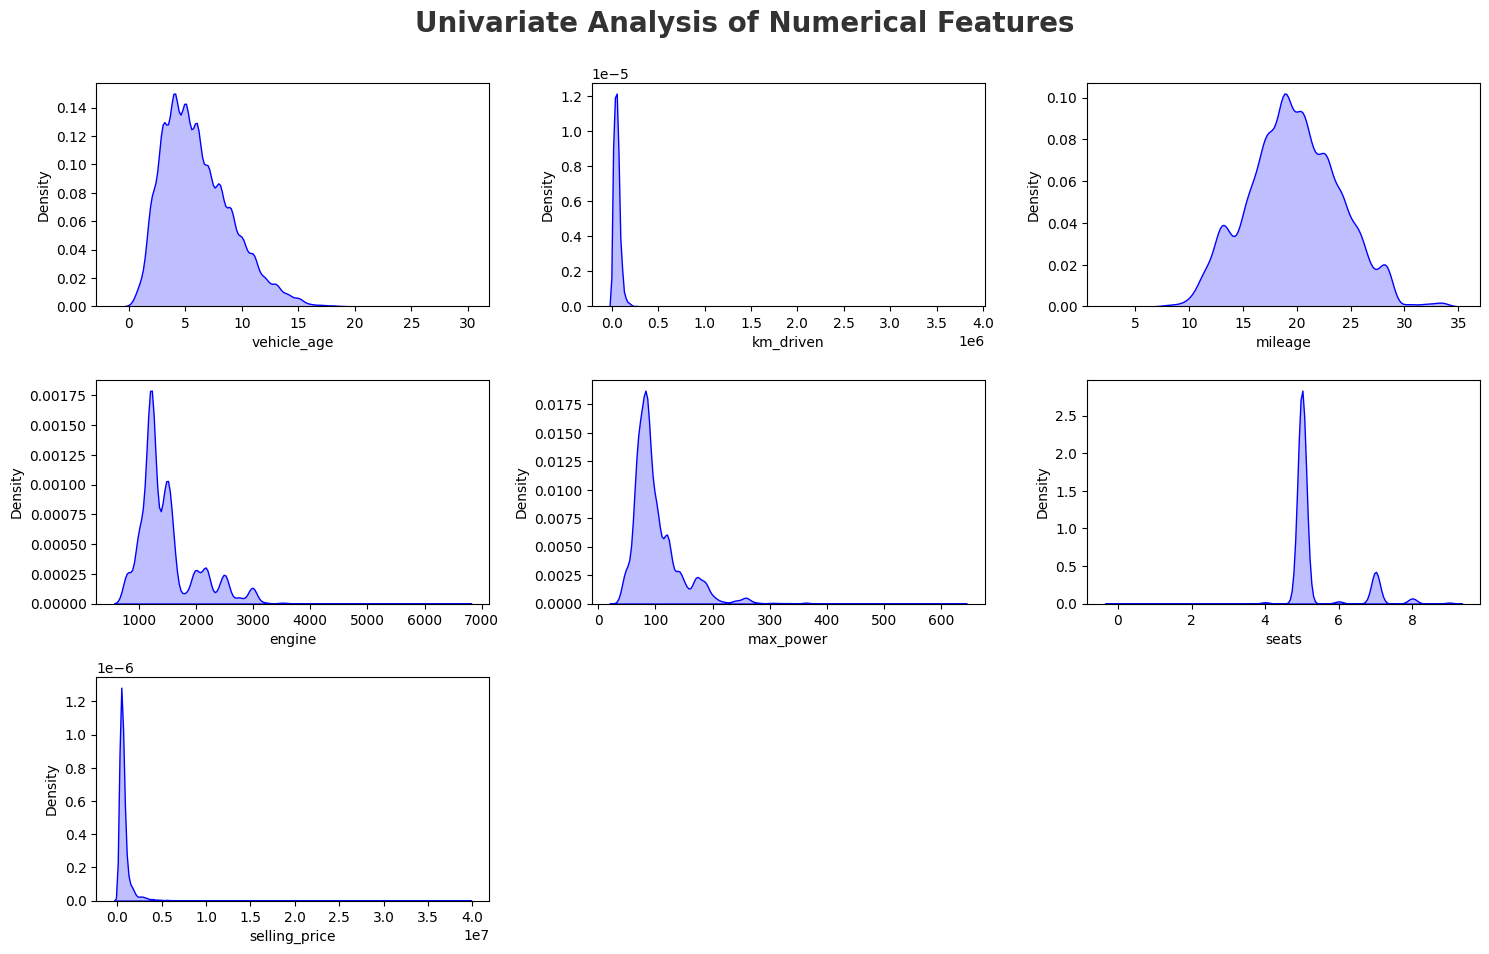

In [12]:
plt.figure(figsize = (15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[numeric_features[i]], shade = True, color = 'b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Observations:

- km_driven, max_power, selling_price, and engine are right skewed and positive skewed.
- Outliers in km_driven, engine, selling_price, and max_power.

### Categorical Features

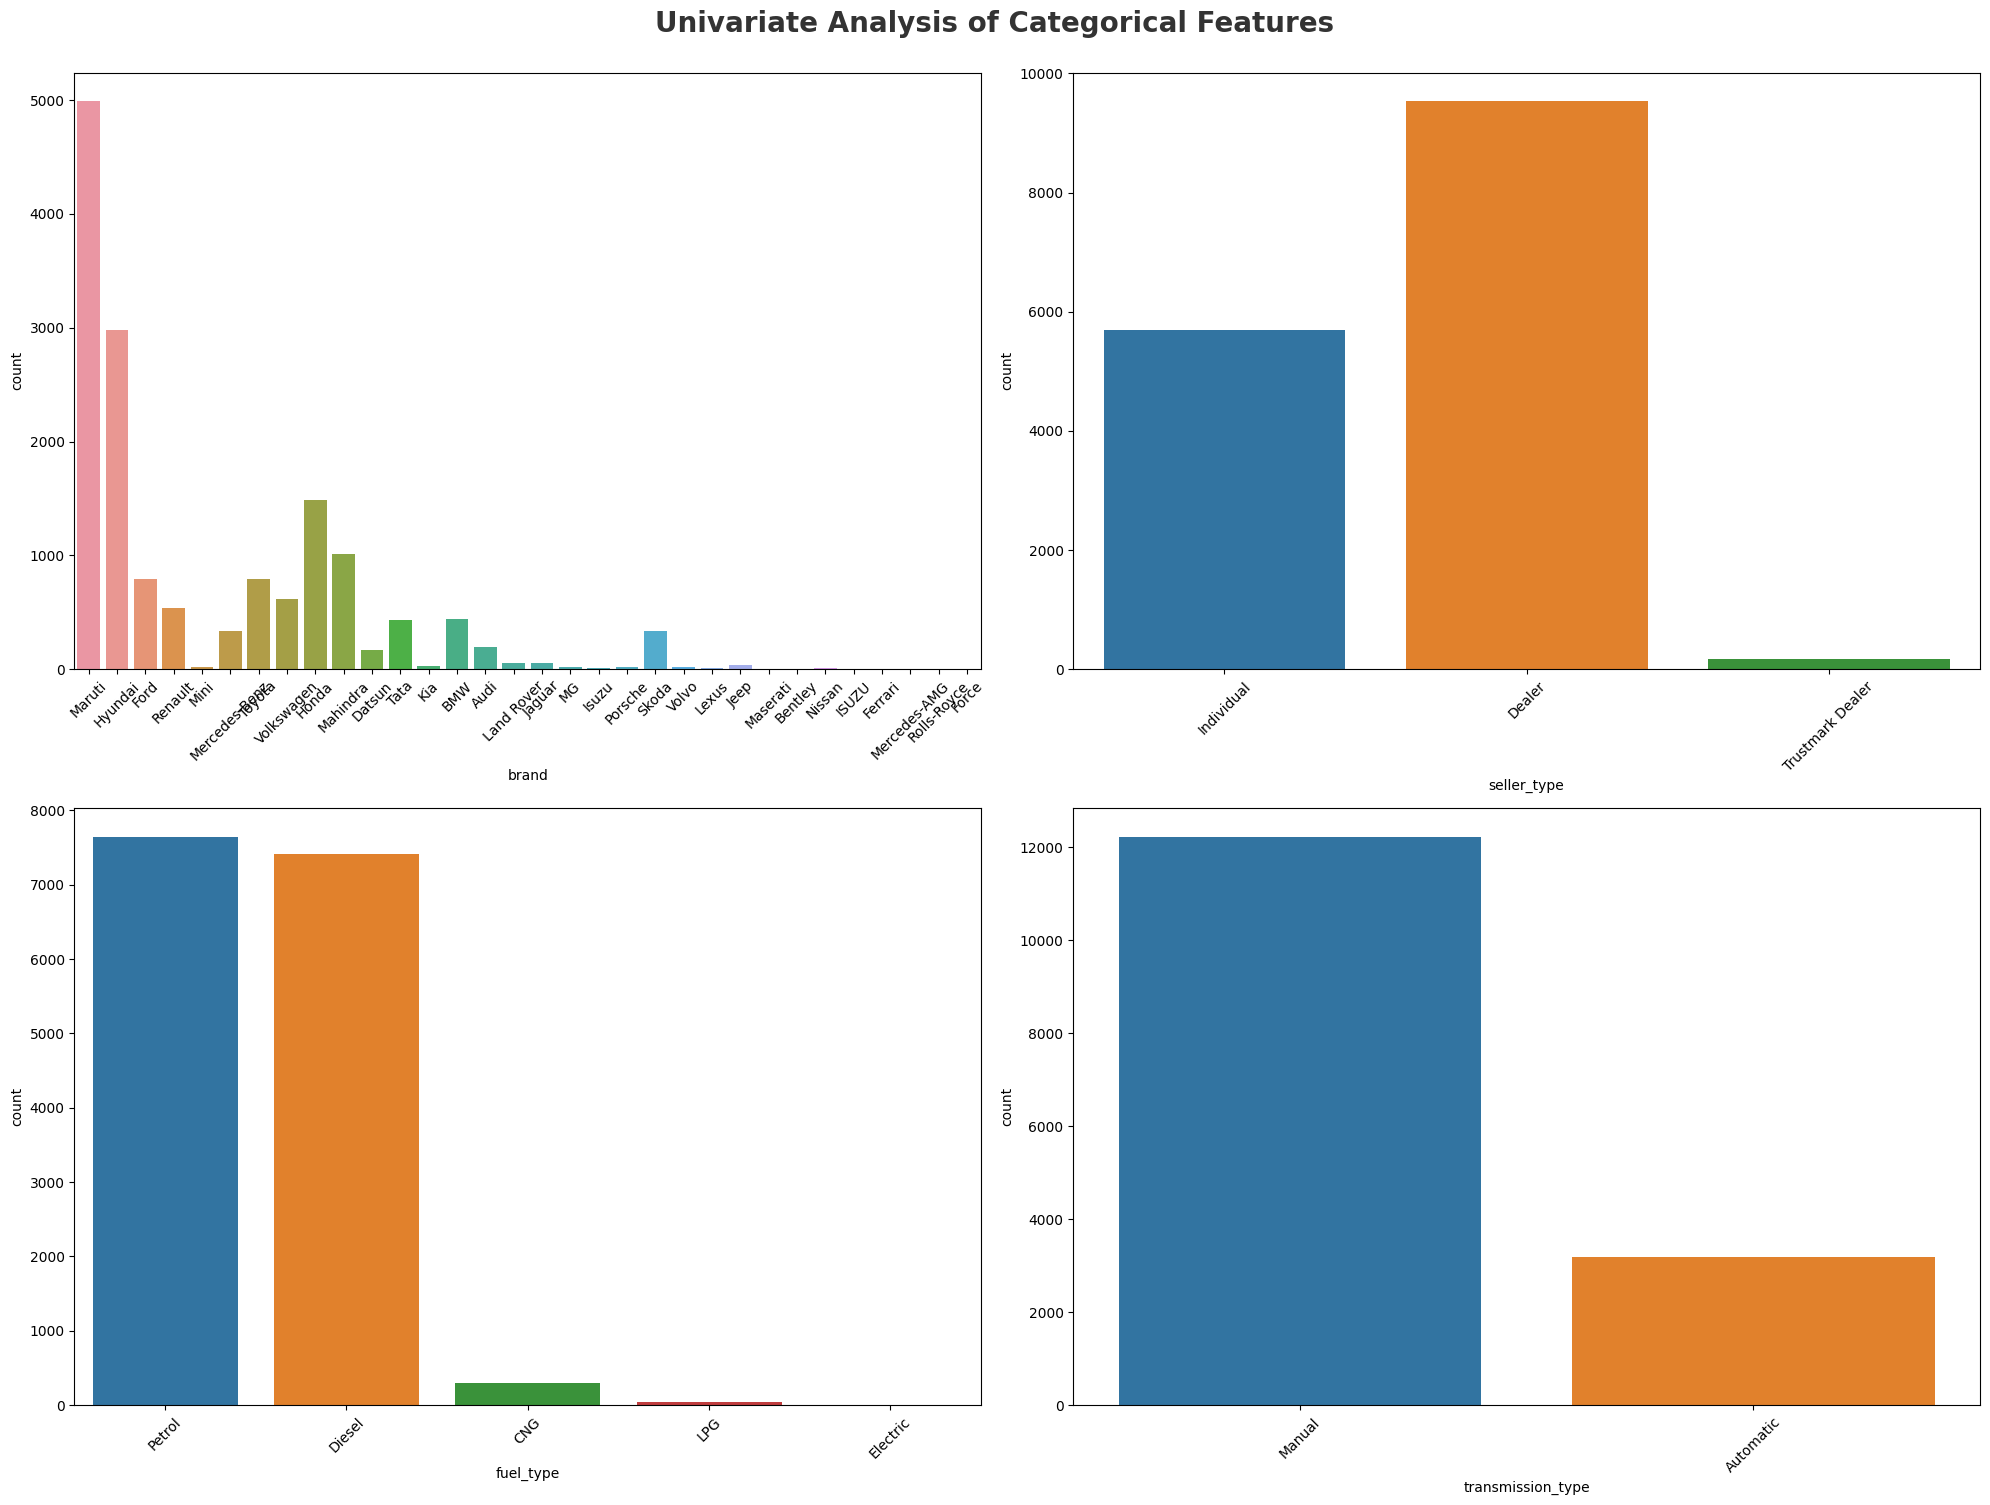

In [14]:
plt.figure(figsize = (20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)
cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

## Multivariate Analysis:

- Multivariate analysis is the analysis of more than one variable.

### Check multicollinearity in Numerical features

In [15]:
df[(list(df.columns)[1:])].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


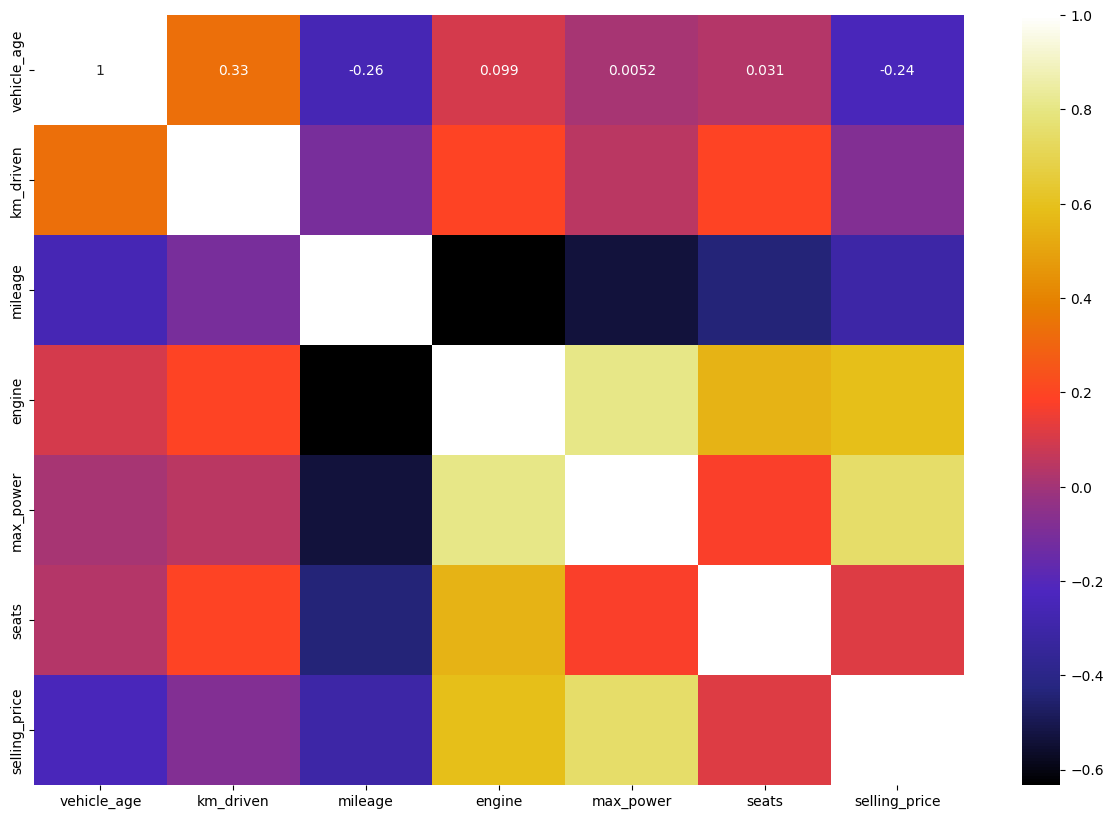

In [16]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = "CMRmap", annot = True)
plt.show()

### Observations:

- There is a high positive correlation between max_power and engine. This indicates strong multicollinearity between these two features.
- There is a moderate positive correlation between km_driven and vehicle_age (0.33). While not as severe as the correlation between max_power and engine, this still indicates some degree of multicollinearity.
- The correlation between mileage and other features like engine is moderate (-0.26), indicating some multicollinearity.

### Check Multicollinearity for Categorical features:

- A chi-squrared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Selling Price.

In [17]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
        
    else: 
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


### Check Null Values

In [18]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [19]:
continues_features = [feature for feature in numeric_features if len(df[feature].unique()) >= 10]
print('Number of continues features: ', continues_features)

Number of continues features:  ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


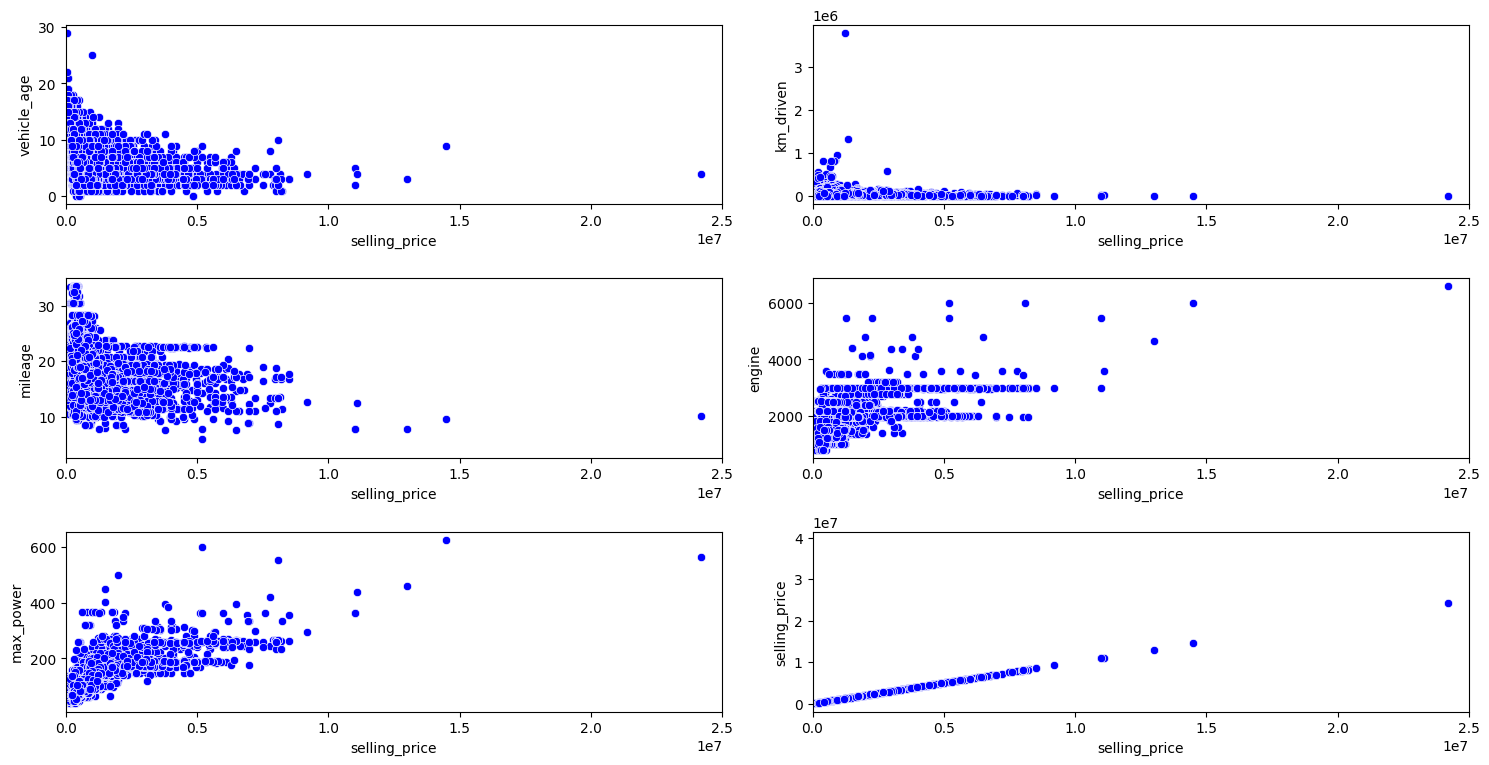

In [20]:
fig = plt.figure(figsize = (15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)
    
    sns.scatterplot(data = df, x = 'selling_price', y = continues_features[i], color = 'b')
    plt.xlim(0, 25000000)
    plt.tight_layout()

## Initial Analysis Report

### Observations:

- Lower vehicle age has higher selling price than vehicle with more age.
- Engine CC has positive effect on selling_price, which means cars with higer engine will have higher selling price. Vehicle with 2000cc and below are mostly prices below 5lakh.
- km_driven has negative effect on selling_price, indicates that cars with fewer km_driven will have higher selling price.

## Visualization

### Visualize the Target Feature

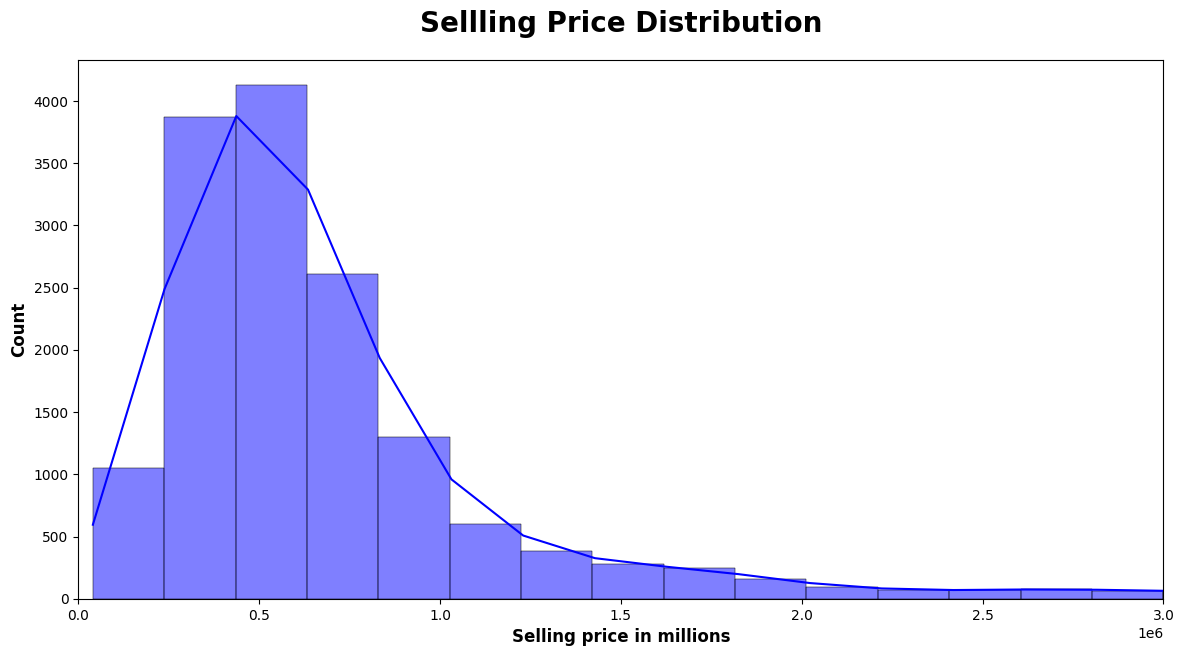

In [22]:
plt.subplots(figsize = (14, 7))
sns.histplot(df.selling_price, bins = 200, kde = True, color = 'b')
plt.title("Sellling Price Distribution", weight = 'bold', fontsize = 20, pad = 20)
plt.ylabel("Count", weight = 'bold', fontsize = 12)
plt.xlabel("Selling price in millions", weight = 'bold', fontsize = 12)
plt.xlim(0, 3000000)
plt.show()

It is left skewed chart for the selling_price feature.

### What is the most used selling car in this website?

In [23]:
df.car_name.value_counts()[0:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

### Hyundai i20 is the most selling used car.

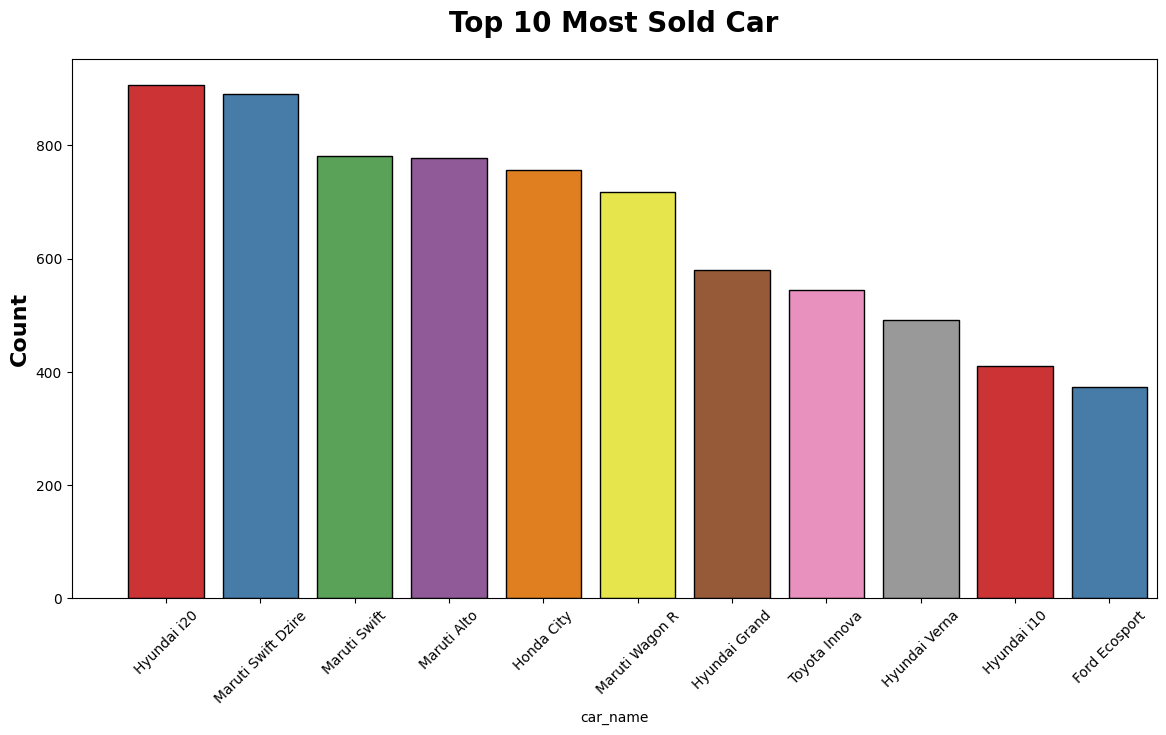

In [24]:
plt.subplots(figsize = (14, 7))
sns.countplot(x = "car_name", data = df, ec = "black", palette = "Set1", order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Count", weight = "bold", fontsize = 16)
plt.xticks(rotation = 45)
plt.xlim(-1, 10.5)
plt.show()

### Check mean price of the most sold cars: Hyundai i20

In [25]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


### Observations:

- The bar chart above displays the top 10 sold cars in this website.
- Hyundai i20 is the most sold cars, followed by Maruti Swift Dzire.
- Mean price of Hyundai i20 car is 5.4 lakhs.
- This feature has impact on the target variable.

### What is the most selling car brand in this website?

In [26]:
df.brand.value_counts()[0:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

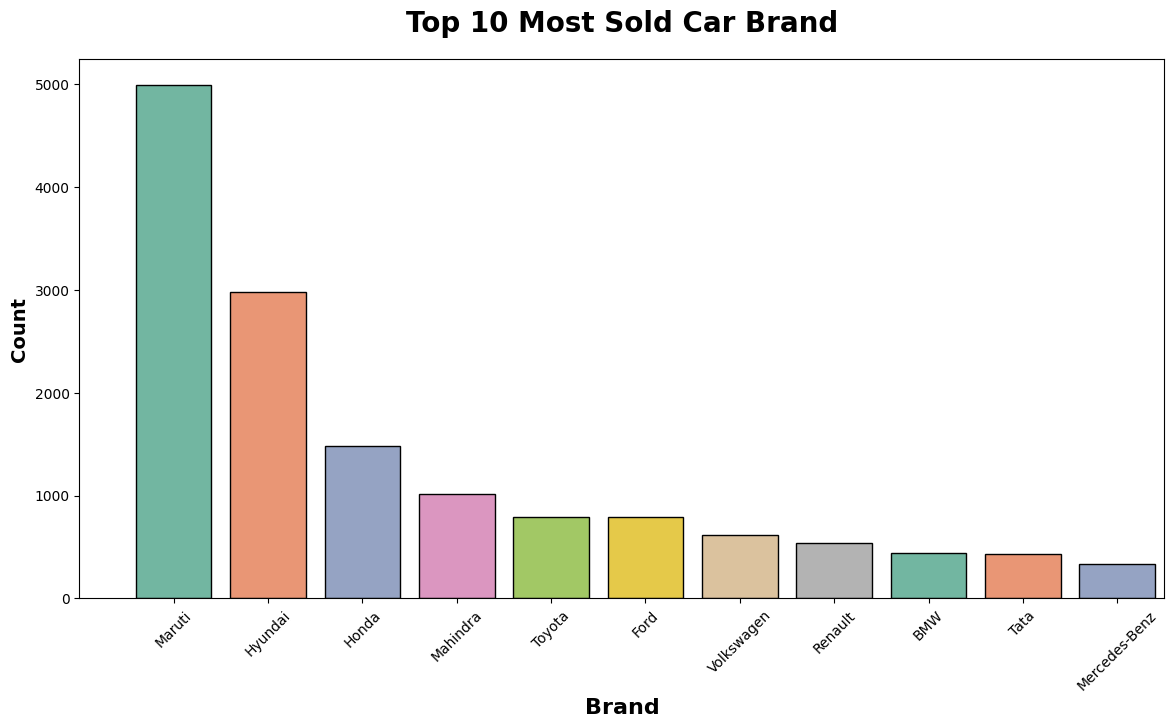

In [27]:
plt.subplots(figsize = (14, 7))
sns.countplot(x = "brand", data = df, ec = "black", palette = "Set2", order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Car Brand", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Count", weight = "bold", fontsize = 14)
plt.xlabel("Brand", weight = "bold", fontsize = 16)
plt.xticks(rotation = 45)
plt.xlim(-1, 10.5)
plt.show()

### Check mean price of the most sold car brand: Maruti

In [28]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of cars under brand Maruti is {maruti:.2f} Rupees')

The mean price of cars under brand Maruti is 487089.32 Rupees


## Observations:

- The chart above displays the top 10 Brand that has the most sold cars in this website.
- The most sold car brand is Maruti, followed by Hyundai and Honda.
- Mean price of Maruti brand is 4.8 lakhs.

### Luxurious Brand and Luxurious Car

In [29]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price', ascending = False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


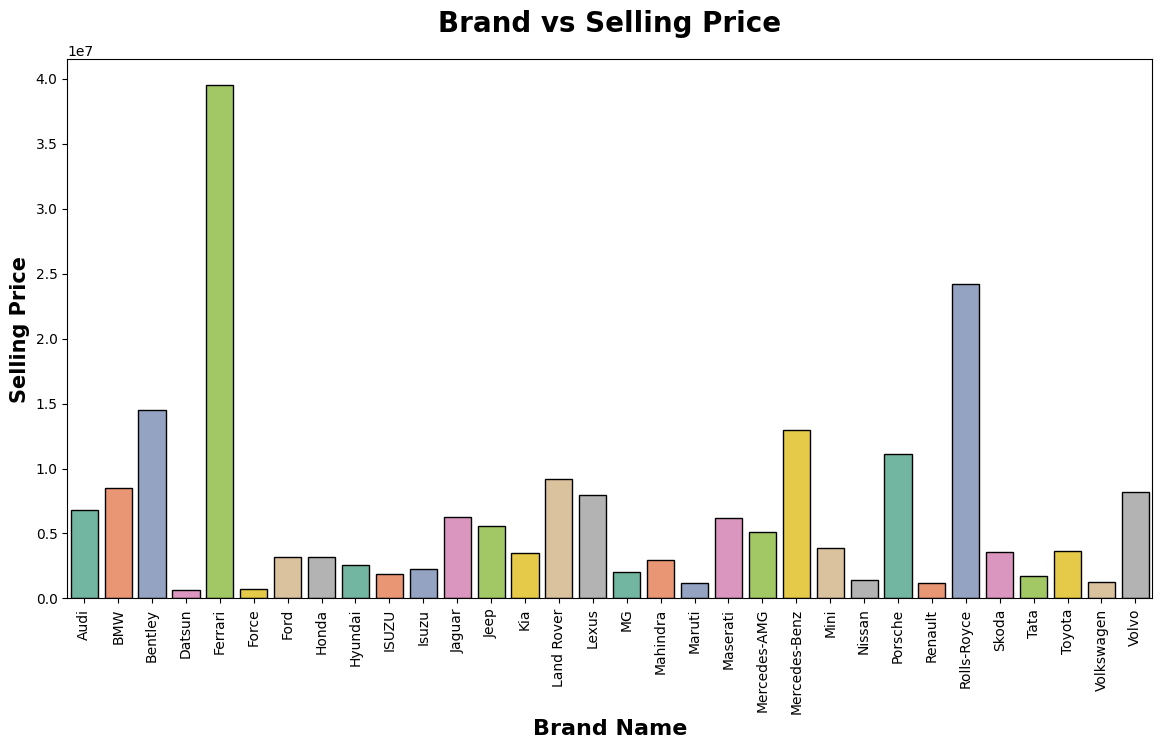

In [31]:
plt.subplots(figsize = (14, 7))
sns.barplot(x = brand.index, y=brand.values, ec = "black", palette = "Set2")
plt.title("Brand vs Selling Price", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Selling Price", weight = "bold", fontsize = 15)
plt.xlabel("Brand Name", weight = "bold", fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

### Observations:

- The most luxurious car brand sold in this website is Ferrari at 3.95 Crores.
- The second one is Rolls-Royce at 2.42 Crores.
- Brand name has very clear impact on the selling price.

### What is the most expensive car sold in this website?

In [33]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price', ascending = False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


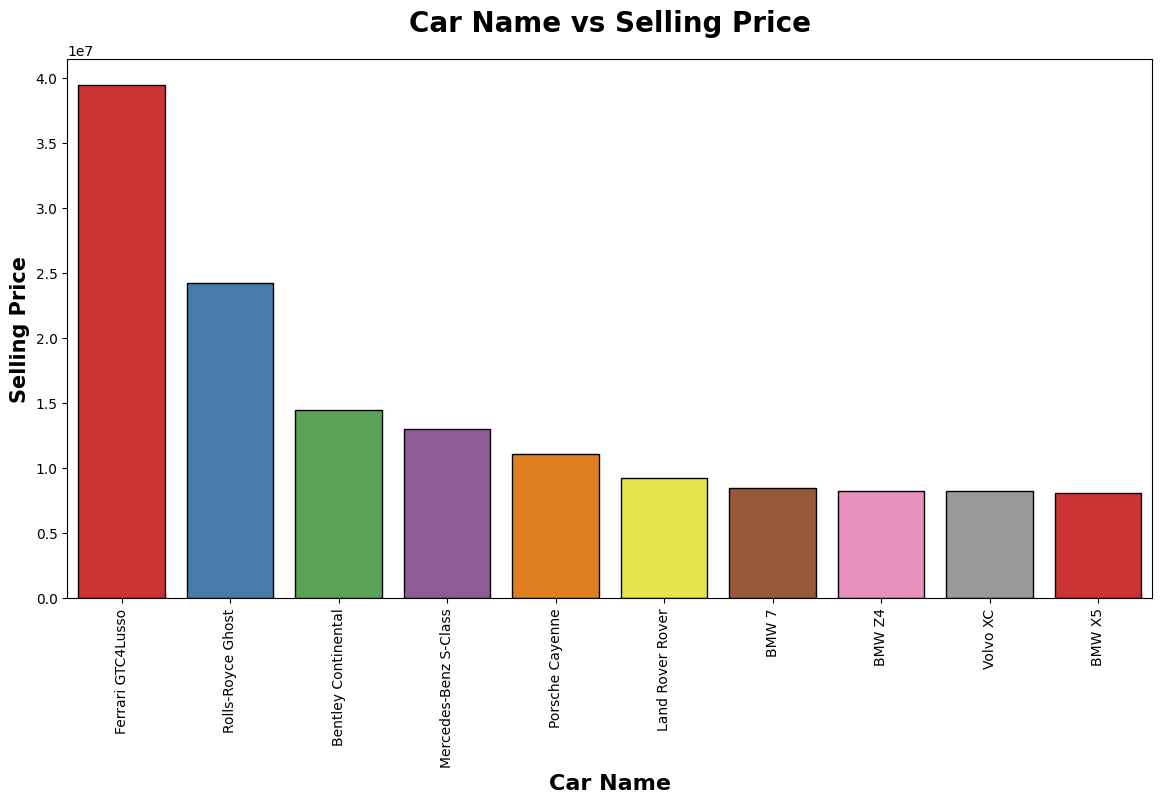

In [34]:
plt.subplots(figsize = (14, 7))
sns.barplot(x = car.index, y = car.selling_price, ec = "black", palette = "Set1")
plt.title("Car Name vs Selling Price", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Selling Price", weight = "bold", fontsize = 15)
plt.xlabel("Car Name", weight = "bold", fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

### Observations:

- The most expensive sold car in this website is Ferrari GTC4 Lusso at 3.95 Crs, the second expensive one is Rolls Royce Ghost.
- Apart from the two most expensive car above, other car has price below 1.5 Crs.

### Most Mileage Brand and Car Name

In [35]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending = False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


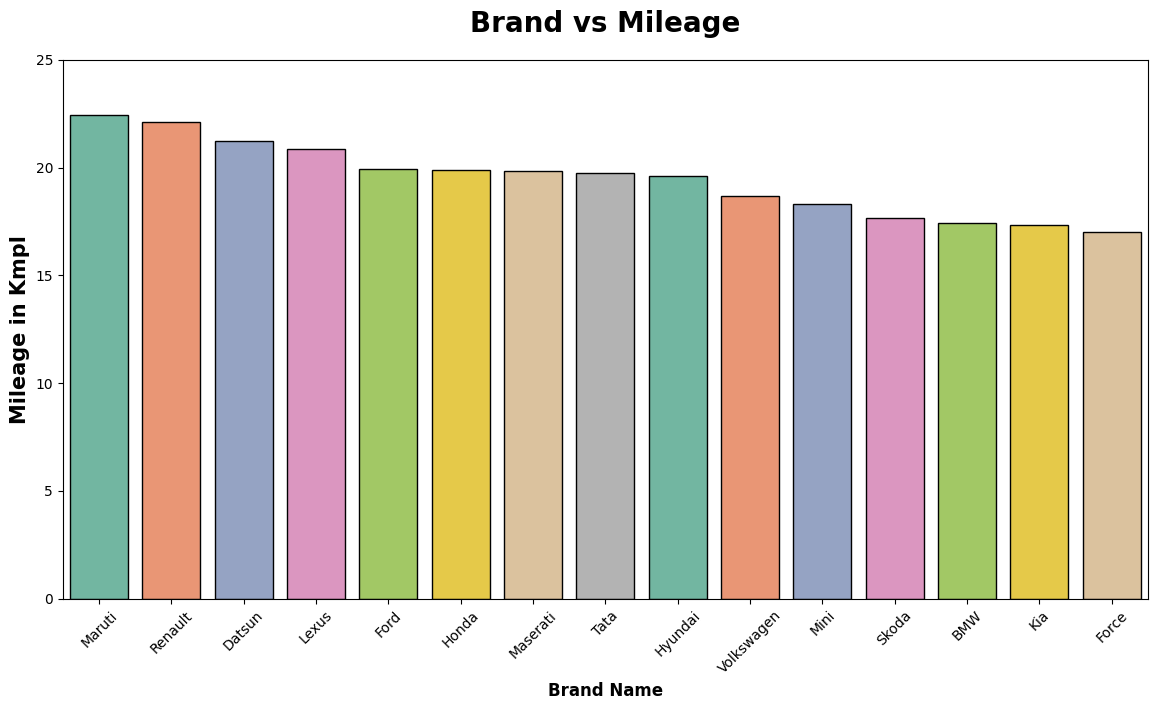

In [37]:
plt.subplots(figsize = (14, 7))
sns.barplot(x = mileage.index, y = mileage.values, ec = "black", palette = "Set2")
plt.title("Brand vs Mileage", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Mileage in Kmpl", weight = "bold", fontsize = 15)
plt.xlabel("Brand Name", weight = "bold", fontsize = 12)
plt.ylim(0, 25)
plt.xticks(rotation = 45)
plt.show()

### Car with the highest Mileage

In [38]:
mileage_C = df.groupby('car_name')['mileage'].mean().sort_values(ascending = False).head(10)
mileage_C.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


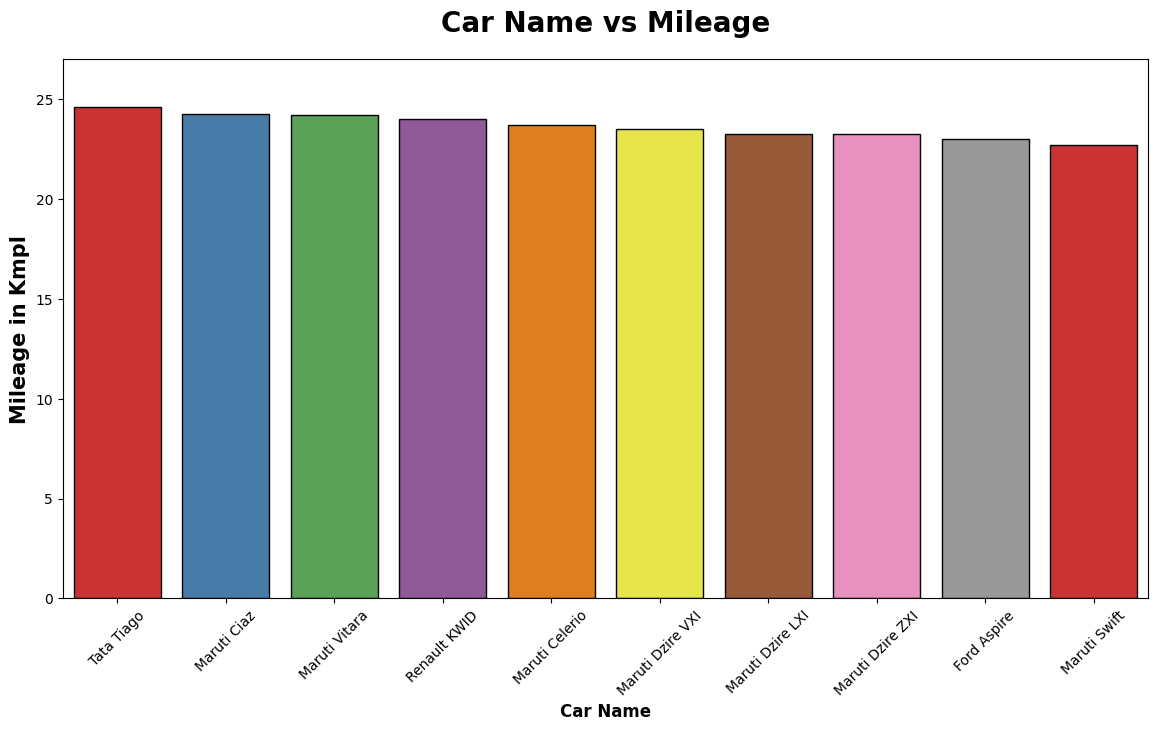

In [39]:
plt.subplots(figsize = (14, 7))
sns.barplot(x = mileage_C.index, y = mileage_C.values, ec = "black", palette = "Set1")
plt.title("Car Name vs Mileage", weight = "bold", fontsize = 20, pad = 20)
plt.ylabel("Mileage in Kmpl", weight = "bold", fontsize = 15)
plt.xlabel("Car Name", weight = "bold", fontsize = 12)
plt.ylim(0, 27)
plt.xticks(rotation = 45)
plt.show()

### Kilometer Driven vs Selling Price

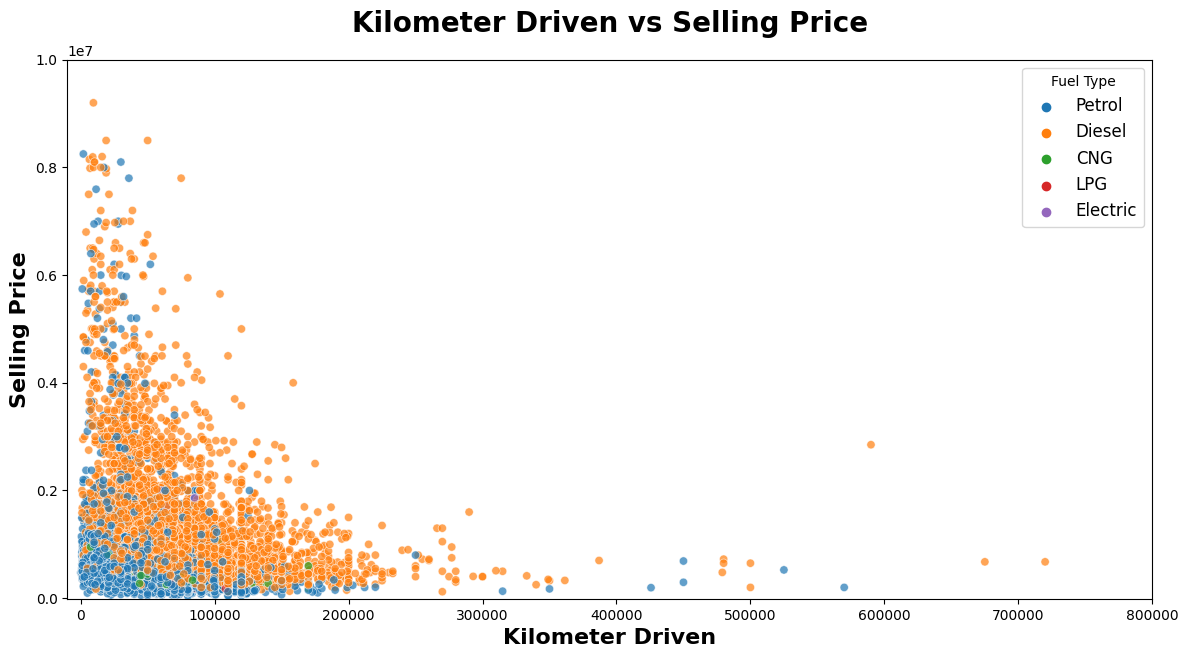

In [42]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x="km_driven", y='selling_price', data=df, edgecolor="white", hue='fuel_type', alpha=0.7)
plt.title("Kilometer Driven vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=16)
plt.xlabel("Kilometer Driven", weight="bold", fontsize=16)
plt.xlim(-10000, 800000) 
plt.ylim(-10000, 10000000)
plt.legend(title='Fuel Type', fontsize=12)
plt.show()

### Observations:

- Many cars were sold with km driven between 0 and 20k Kilometer.
- Low km_driven cars had more selling price compared to cars with high km_driven.

### Fuel Type vs Selling Price

In [43]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending = False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


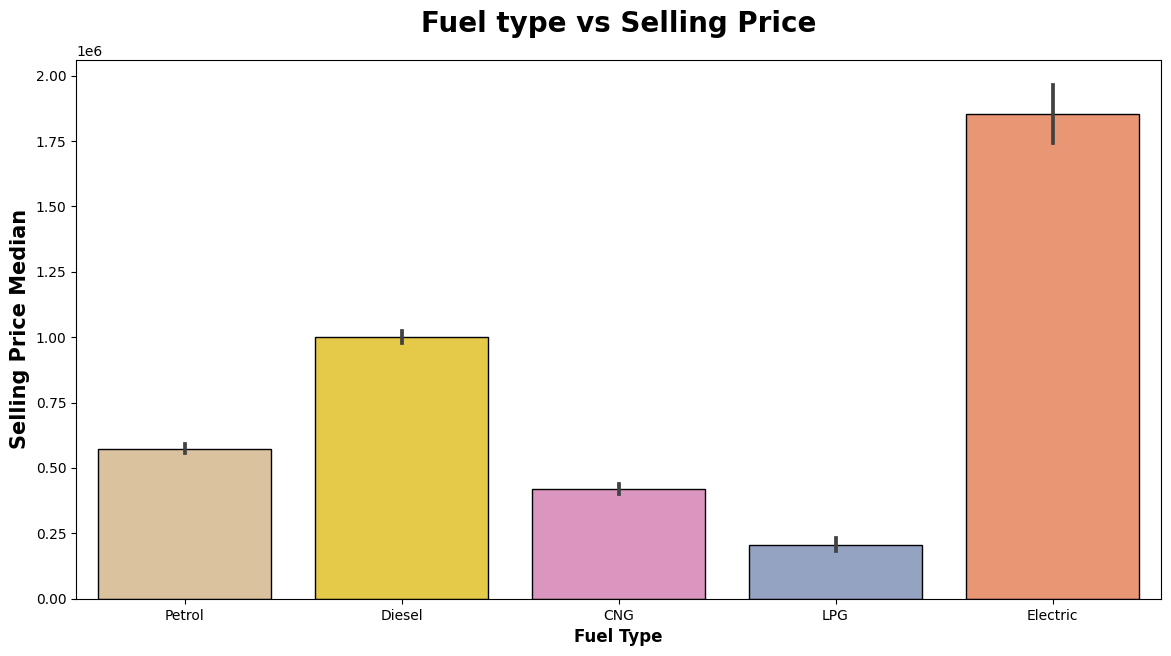

In [44]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel_type, y=df.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Observations:

- Electric cars have higher selling average price, followed by Diesel and Petrol.
- Fuel type is also an important feature for the target variable.

### Most sold fuel type

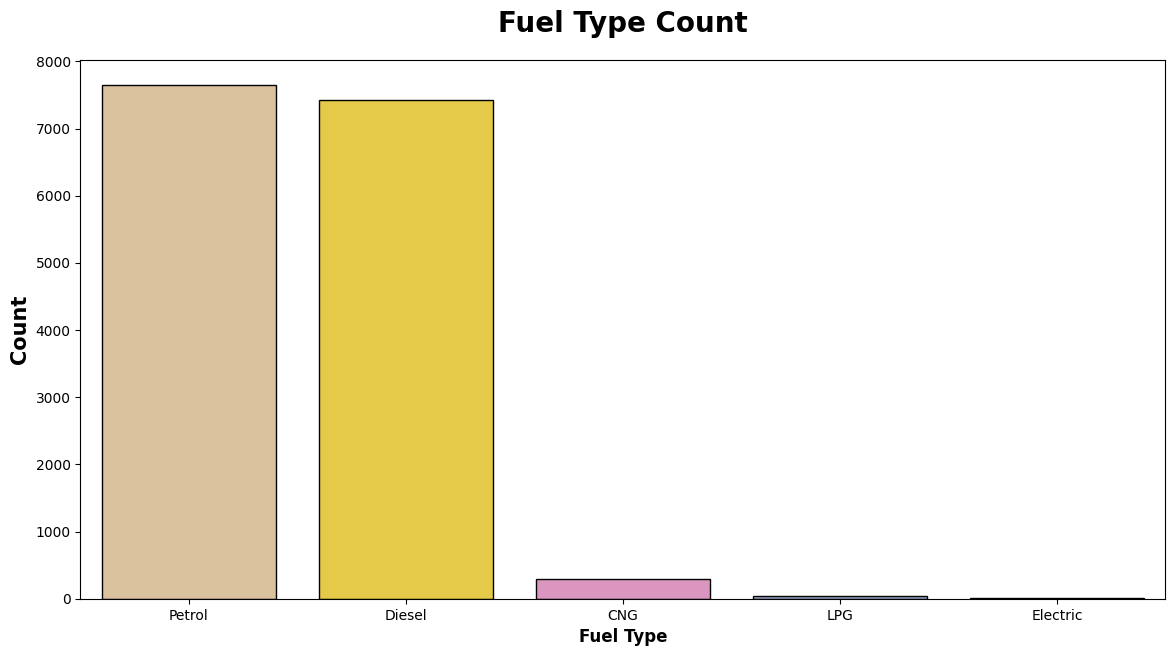

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Observations:

- Petrol and Diesel dominate the used car market in this website.
- The most sold fuel type vehicle is Petrol around 7.8k units, followed by Diesel.
- The least sold type of cars is Electric ones.

### Fuel types available and mileage given

In [47]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending = False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


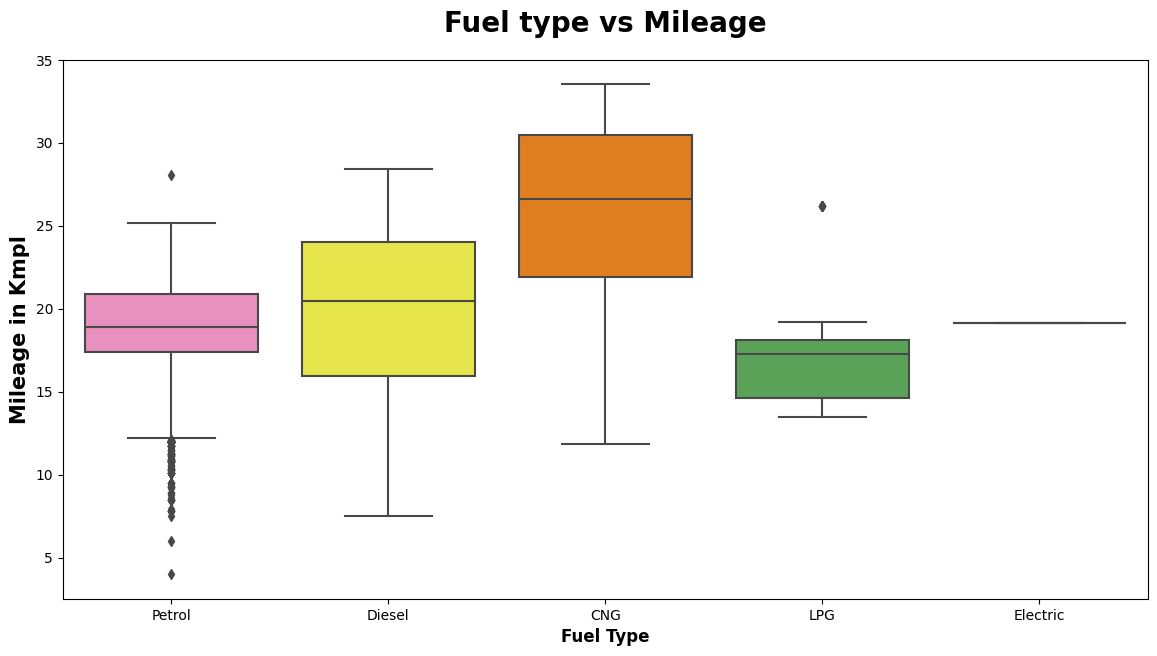

In [48]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Mileage vs Selling Price

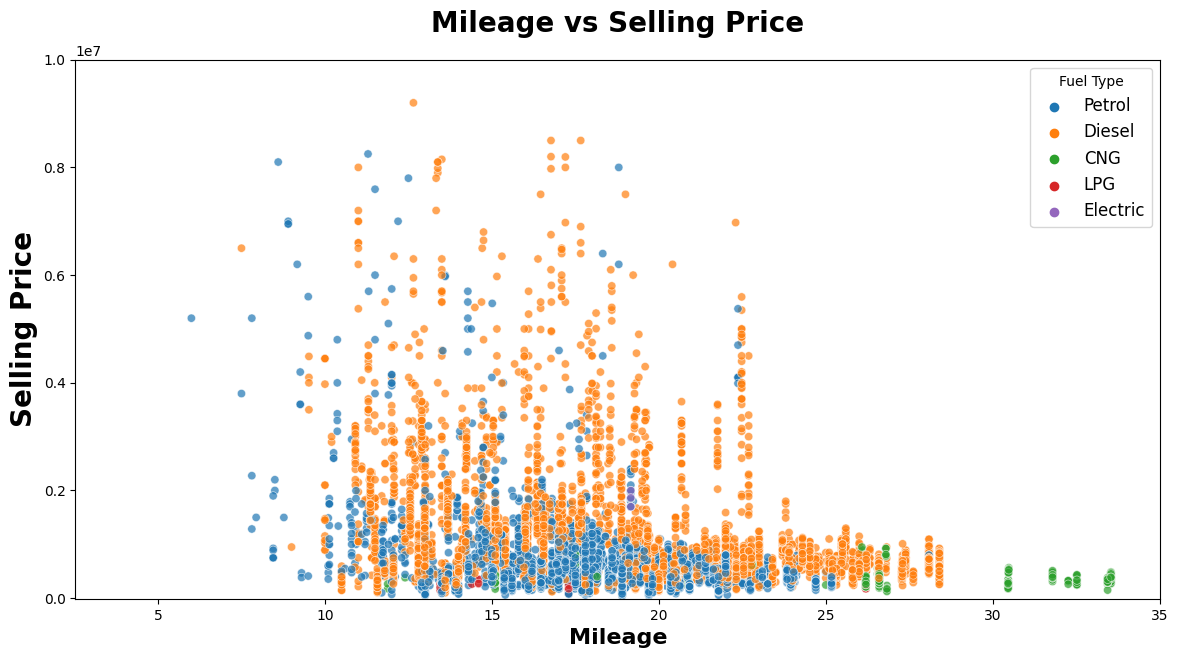

In [51]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x="mileage", y='selling_price', data=df, edgecolor="white", hue='fuel_type', alpha=0.7)
plt.title("Mileage vs Selling Price", weight="bold", fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.ylim(-10000, 10000000)
plt.legend(title='Fuel Type', fontsize=12)
plt.show()

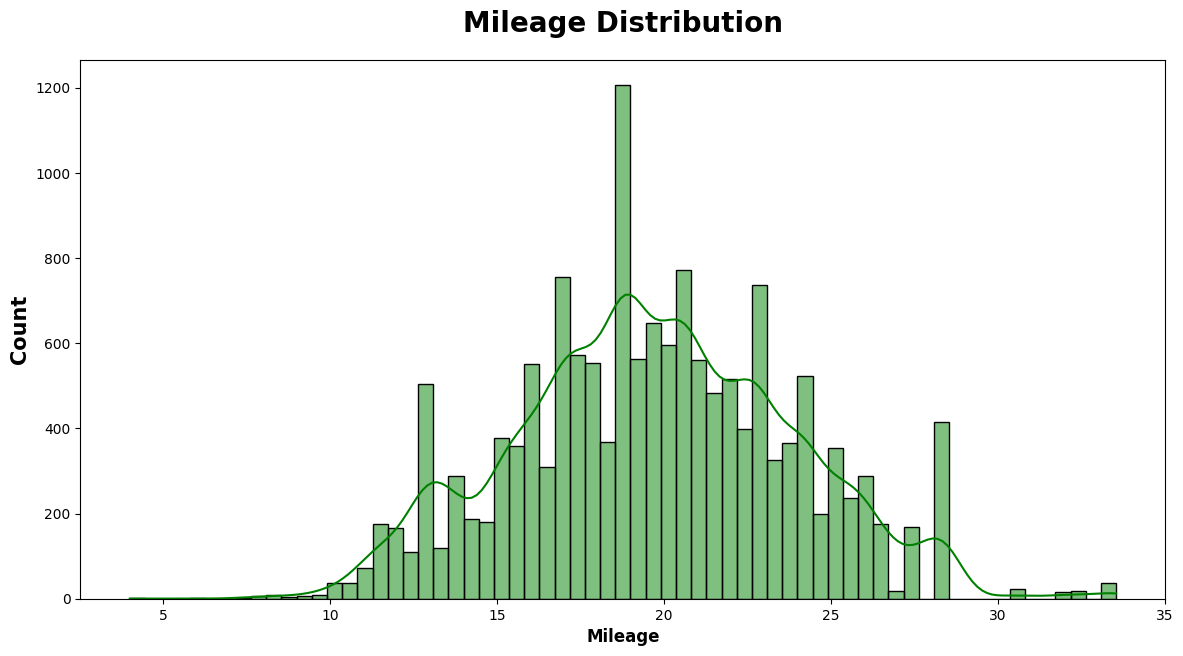

In [52]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

### Vehicle Age vs Selling Price

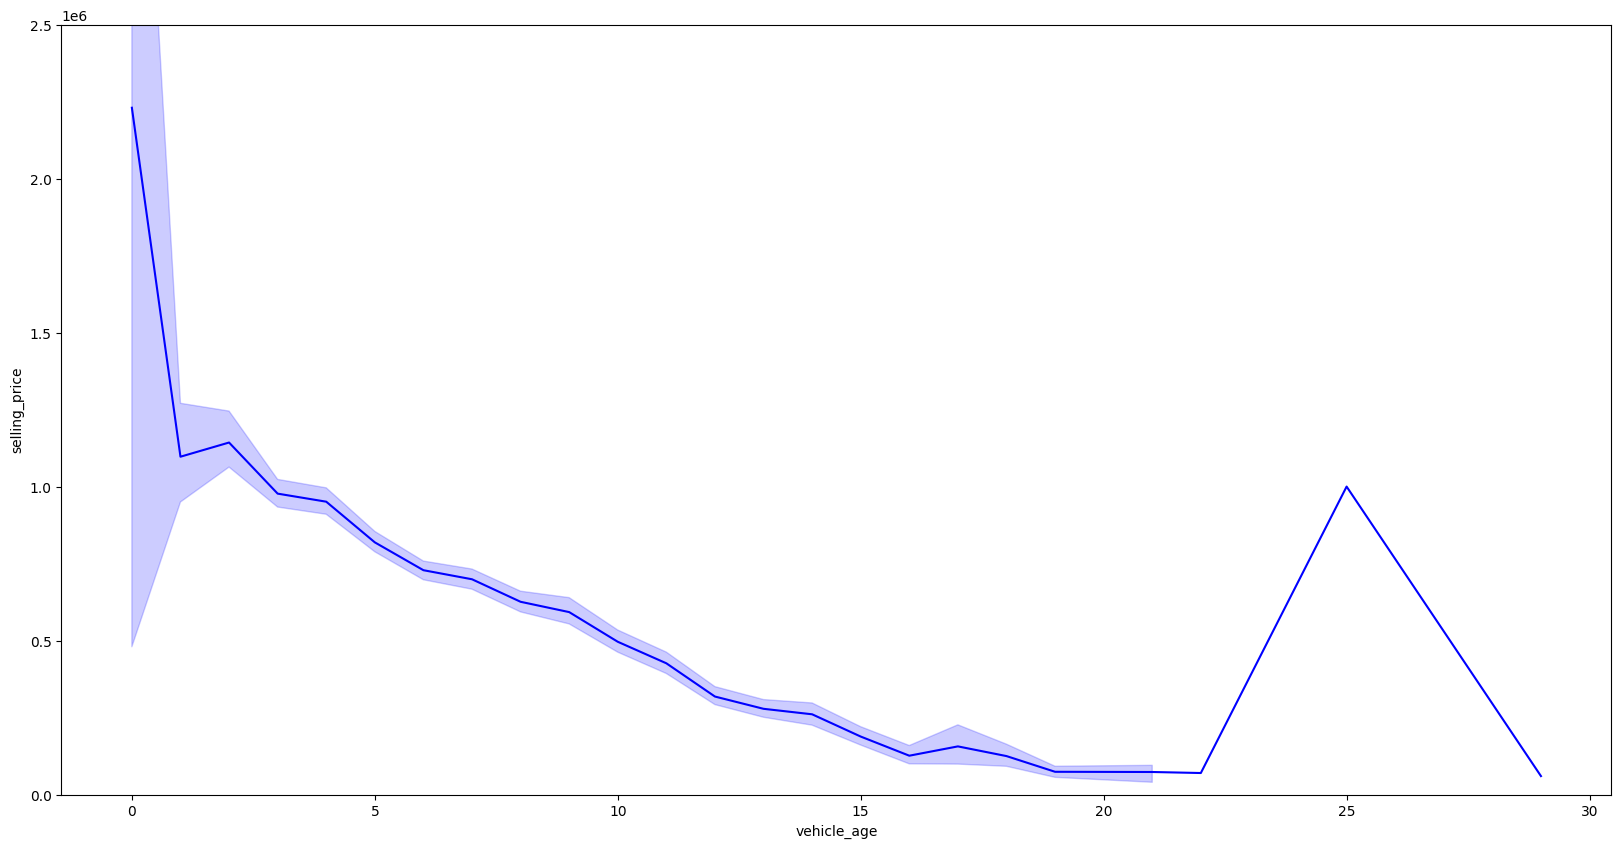

In [53]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

### Observations:

- The higer age that a vehicle had, the less the price was.
- Vehicle age has negative impact on selling price.

### Vehicle Age vs Mileage

In [54]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending = False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


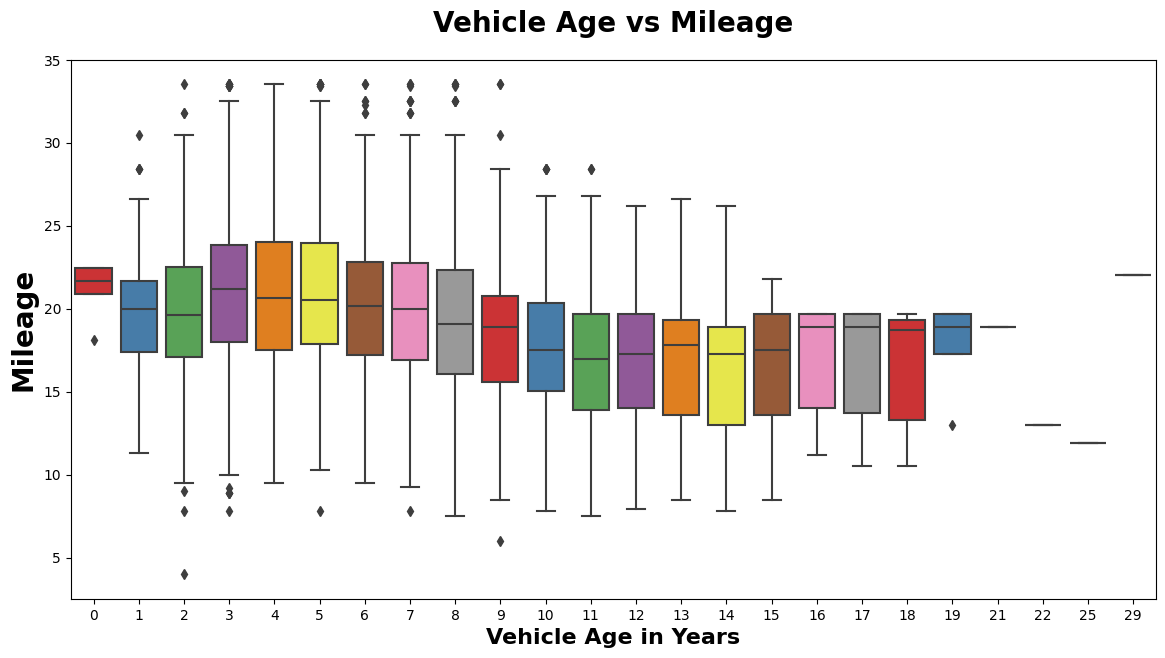

In [55]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

### Observations:

- When the age of vehicle increase, the median of mileage decreases.
- Newer vehicles have more mileage median than the older ones.

In [56]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending = False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


### Observation:

- Maruti Alto is the oldest car in this website with 29 years old, followed by BMW 3 that is 25 years old.

### Transmission Type

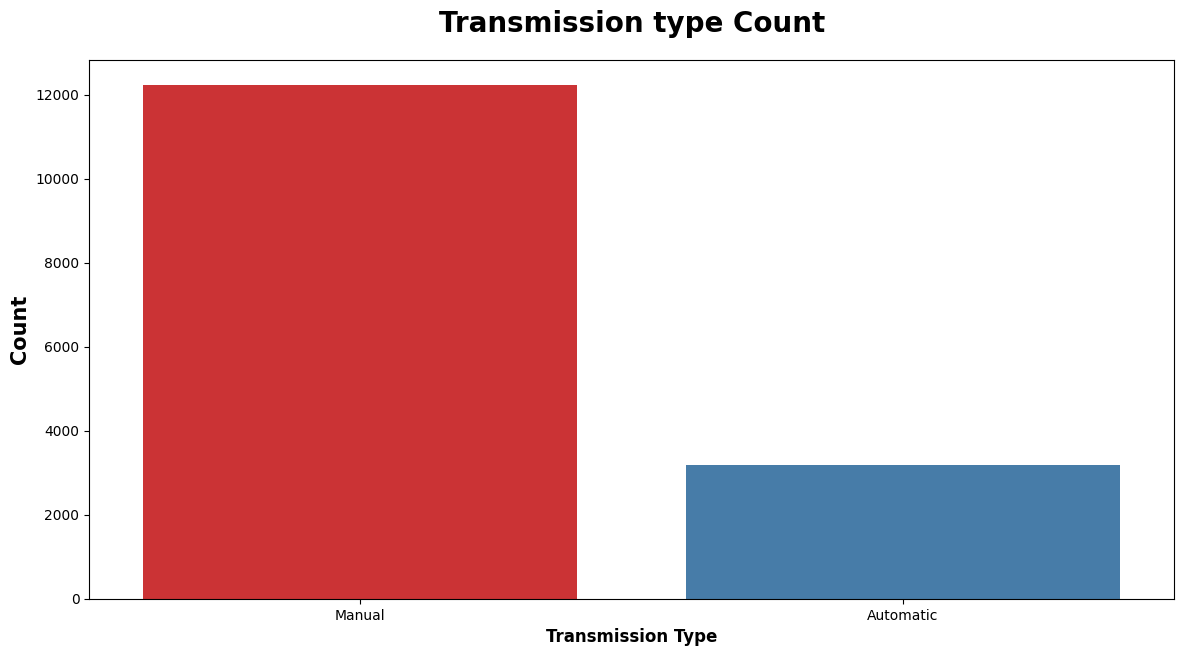

In [57]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

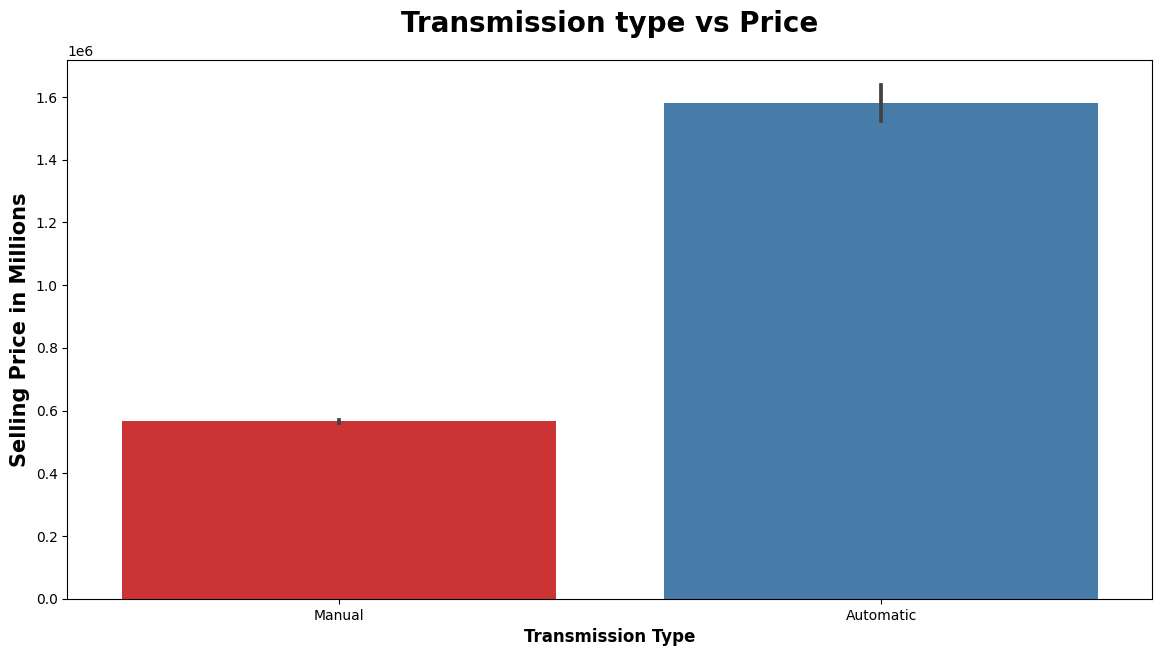

In [58]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

### Observations:

- Most of the cars were sold in manual transmission.
- Automatic transmission have more selling price than the manual ones.

### Seller Type

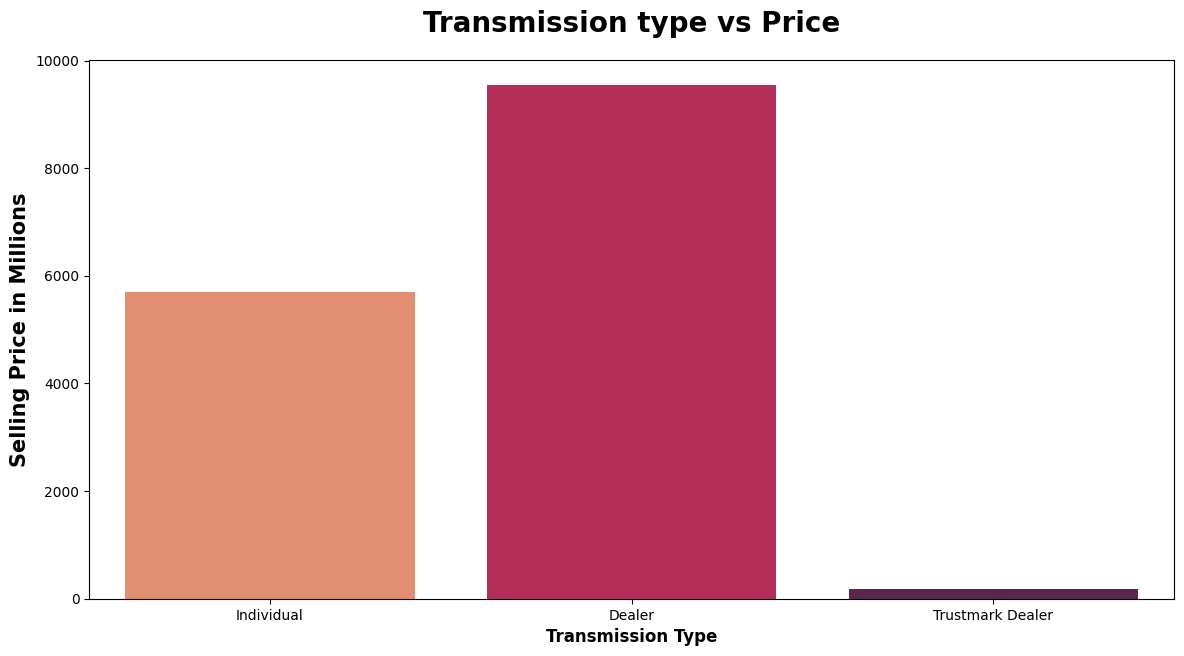

In [59]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [60]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


### Observations:

- Dealers have put more advertisements on used car website. They have put 9539 ads with the median selling price of 5.91 lakhs.
- Individuals have put 5699 ads with the median selling price os 5.4 lakhs.
- Dealers has more median selling price than individuals.